<a href="https://colab.research.google.com/github/AnandSinhaProjects/AI_FOR_MEDICAL_TASKS/blob/main/2D%5CImage_Preprocessing%5CImage_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import glob
import tensorflow as tf

In [3]:
d = pd.read_csv('/content/paths_and_labels.csv')

In [4]:
d.head()

,img_path,class
0,mdb003.pgm.png,dense
1,mdb004.pgm.png,dense
2,mdb033.pgm.png,dense
3,mdb034.pgm.png,dense
4,mdb035.pgm.png,dense


In [6]:
ti=d.img_path[0]

In [15]:
from skimage import io

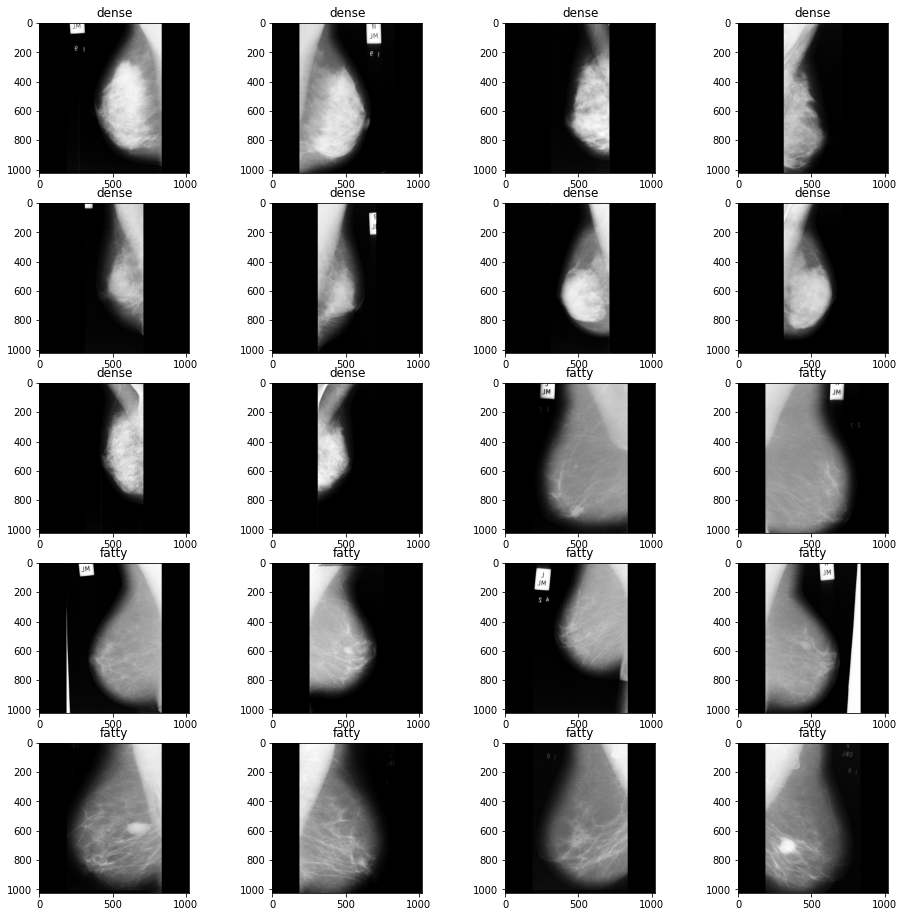

In [17]:
fig, m_axs = plt.subplots(5,4, figsize=(16,16))
m_axs = m_axs.flatten()
imgs= d.img_path
ind=0

for img, ax in zip(imgs, m_axs):
  img = io.imread(img)
  ax.imshow(img,cmap='gray')
  ax.set_title(d.iloc[ind]['class'])
  ind = ind + 1

In [19]:
imgs.head()

0    mdb003.pgm.png
1    mdb004.pgm.png
2    mdb033.pgm.png
3    mdb034.pgm.png
4    mdb035.pgm.png
Name: img_path, dtype: object

In [21]:
m_axs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f20d4e2c990>,
      dtype=object)

In [29]:
idg=ImageDataGenerator(rescale=1./255.0,
                       horizontal_flip=True,
                       vertical_flip=False,
                       height_shift_range=0.1,
                       width_shift_range=0.1,
                       rotation_range=20,
                       shear_range = 0.1,
                       zoom_range = 0.2)

gen = idg.flow_from_dataframe(dataframe=d,
                            x_col = 'img_path',
                            y_col = 'class',
                            class_mode = 'binary',
                            target_size= (224, 224),
                            batch_size=9)

Found 20 validated image filenames belonging to 2 classes.


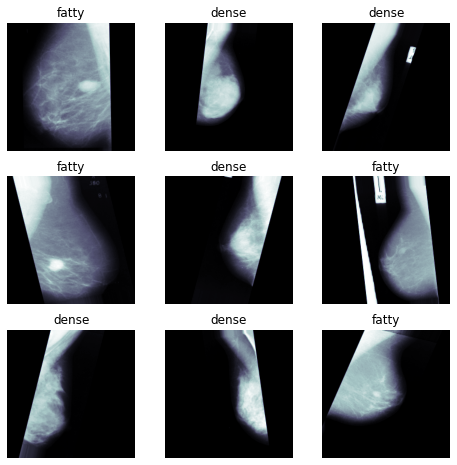

In [33]:
t_x,t_y = next(gen)
fig, m_axs = plt.subplots(3,3, figsize=(8,8))
for (c_x,c_y,c_ax) in zip(t_x,t_y,m_axs.flatten()):
  c_ax.imshow(c_x[:,:,0], cmap='bone')
  if c_y == 1:
    c_ax.set_title('fatty')
  else:
    c_ax.set_title('dense')
  c_ax.axis('off')